In [1]:
import pandas as pd
import pycountry_convert as pycon
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

#  group member Lists
group_members = pd.DataFrame({
    'Group Member List': ['Name', 'Maru Mengistu', 'Negash Israel', 'Sofia Muhammed', 'Sosina Mehrete', 'Mohammed Sisay', 'Sufiyan Hamid'],
    '': ['ID', 'UGR/3905/13', 'UGR/1439/13', 'UGR/7884/13', 'UGR/9824/13', 'UGR/5410/13', 'UGR/9520/13']
})

styler = group_members.style

# Setting table styles
styler.set_table_styles([
    {
        'selector': 'table',
        'props': [('background-color', 'white'), ('margin', '5px')]
    },
    {
        'selector': 'th, td',
        'props': [('border', '2px solid white'), ('padding', '20px'), ('color', 'white'), ('font-weight', 'bold'), ('font-size', '25px')]
    },
    {
        'selector': 'th',
        'props': [('background-color', 'white'), ('color', 'black')]
    }
])

# Creating title and footer
title = "<h1 style='text-align: center; font-size:30px'>Python Lab Project</h1>"
footer = "<p style='text-align: right;'><strong>SUBMITTED TO:</strong> Dr.Michael Melese <br/><strong>SUBMISSION DATE:</strong> May 31, 2024</p>"

# Generating the HTML code for the table
table_html = styler.to_html()

# Combining title, table, and footer with flexbox for centering
html_code = f"""
<div style='display: flex; flex-direction: column; align-items: center;'>
    {title}
    <div style='display: flex; justify-content: center;'>
        {table_html}
    </div>
    {footer}
</div>
"""

# Displaying the HTML
display(HTML(html_code))

,Group Member List,
0,Name,ID
1,Maru Mengistu,UGR/3905/13
2,Negash Israel,UGR/1439/13
3,Sofia Muhammed,UGR/7884/13
4,Sosina Mehrete,UGR/9824/13
5,Mohammed Sisay,UGR/5410/13
6,Sufiyan Hamid,UGR/9520/13


In [2]:
df = pd.read_csv(r"C:\Users\hp\Desktop\python\air_pollution-main\data_processing\air_pollution_data.csv")

In [3]:
df = df.melt(id_vars = ("Country Name", "Country Code"))

In [4]:
df = df.rename(columns = {"variable": "year", "value": "air pollution", "Country Name": "country", "Country Code": "code"})

In [5]:
df = df.sort_values(["country", "year"]).reset_index(drop = True)


In [6]:
df

,country,code,year,air pollution
0,Afghanistan,AFG,2010,65.245592
1,Afghanistan,AFG,2011,66.835727
2,Afghanistan,AFG,2012,66.023174
3,Afghanistan,AFG,2013,61.366745
4,Afghanistan,AFG,2014,59.010330
...,...,...,...,...
1915,Zimbabwe,ZWE,2013,23.111088
1916,Zimbabwe,ZWE,2014,22.805950
1917,Zimbabwe,ZWE,2015,21.733709
1918,Zimbabwe,ZWE,2016,21.726947


In [7]:
df = df[df["code"].isin(["ARB", "CSS", "CEB", "EAR", "EAS", "TEA", "EAP", "EMU", "ECS", "TEC", "ECA", "EUU", "FCS", "HPC", "HIC", "IBD", "IBT", "IDB", "IDX", "IDA", "LTE", "LCN", "LAC", "TLA", "LDC", "LMY", "LIC", "LMC", "MEA", "TMN", "MNA", "MIC", "NAC", "OED", "OSS", "PSS", "PST", "PRE", "SST", "SAS", "TSA", "SSF", "TSS", "SSA", "UMC", "WLD"]) == False]

In [8]:
df.loc[:, "code2"] = df["code"].apply(pycon.country_alpha3_to_country_alpha2)

C:\Users\hp\AppData\Local\Temp\ipykernel_2828\1503383459.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "code2"] = df["code"].apply(pycon.country_alpha3_to_country_alpha2)


In [9]:
df = df[df['code2'].isin(["TL"]) == False]

In [10]:
df['continent'] = df['code2'].apply(pycon.country_alpha2_to_continent_code)

In [11]:
df

,country,code,year,air pollution,code2,continent
0,Afghanistan,AFG,2010,65.245592,AF,AS
1,Afghanistan,AFG,2011,66.835727,AF,AS
2,Afghanistan,AFG,2012,66.023174,AF,AS
3,Afghanistan,AFG,2013,61.366745,AF,AS
4,Afghanistan,AFG,2014,59.010330,AF,AS
...,...,...,...,...,...,...
1915,Zimbabwe,ZWE,2013,23.111088,ZW,AF
1916,Zimbabwe,ZWE,2014,22.805950,ZW,AF
1917,Zimbabwe,ZWE,2015,21.733709,ZW,AF
1918,Zimbabwe,ZWE,2016,21.726947,ZW,AF


In [12]:
continent_codes={'NA':'4', 
                 'AS':'2', 
                 'EU':'3', 
                 'AF':'1', 
                 'SA':'5', 
                 'OC':'6'}

df['continent code']=df['continent'].map(continent_codes)

In [13]:
continent_names={'NA':'North America', 
                 'AS':'Asia', 
                 'EU':'Europe', 
                 'AF':'Africa', 
                 'SA':'South America', 
                 'OC':'Oceania'}
df['continent']=df['continent'].map(continent_names)

In [14]:
df

,country,code,year,air pollution,code2,continent,continent code
0,Afghanistan,AFG,2010,65.245592,AF,Asia,2
1,Afghanistan,AFG,2011,66.835727,AF,Asia,2
2,Afghanistan,AFG,2012,66.023174,AF,Asia,2
3,Afghanistan,AFG,2013,61.366745,AF,Asia,2
4,Afghanistan,AFG,2014,59.010330,AF,Asia,2
...,...,...,...,...,...,...,...
1915,Zimbabwe,ZWE,2013,23.111088,ZW,Africa,1
1916,Zimbabwe,ZWE,2014,22.805950,ZW,Africa,1
1917,Zimbabwe,ZWE,2015,21.733709,ZW,Africa,1
1918,Zimbabwe,ZWE,2016,21.726947,ZW,Africa,1


In [15]:
df_continent = df.groupby(['continent', 'continent code', 'year'], as_index = False).sum()

In [16]:
df_continent.to_csv("continent_data.csv", index = False)

In [17]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [18]:
df['air pollution normalized'] = normalize(pd.DataFrame(df['air pollution']))

In [19]:
def calculate_quality(value):
    quality = ""
    if value > 0.75: 
        quality = "Poor"
    elif 0.60 < value <= 0.75:
        quality = "Very Bad"
    elif 0.45 < value <= 0.60:
        quality = "Bad"
    elif 0.30 < value <= 0.45:
        quality = "Good"
    elif 0.15 < value <= 0.30:
        quality = "Very Good"
    elif value <= 0.15:
        quality = "Excellent"

    return quality

In [20]:
calculate_quality(0.4)

'Good'

In [21]:
df

,country,code,year,air pollution,code2,continent,continent code,air pollution normalized
0,Afghanistan,AFG,2010,65.245592,AF,Asia,2,0.625604
1,Afghanistan,AFG,2011,66.835727,AF,Asia,2,0.642356
2,Afghanistan,AFG,2012,66.023174,AF,Asia,2,0.633796
3,Afghanistan,AFG,2013,61.366745,AF,Asia,2,0.584741
4,Afghanistan,AFG,2014,59.010330,AF,Asia,2,0.559916
...,...,...,...,...,...,...,...,...
1915,Zimbabwe,ZWE,2013,23.111088,ZW,Africa,1,0.181723
1916,Zimbabwe,ZWE,2014,22.805950,ZW,Africa,1,0.178509
1917,Zimbabwe,ZWE,2015,21.733709,ZW,Africa,1,0.167213
1918,Zimbabwe,ZWE,2016,21.726947,ZW,Africa,1,0.167142


In [22]:
len(df['air pollution'].unique())

1544

In [23]:
len(df['air pollution normalized'].unique())

1544

In [24]:
df['air quality'] = df['air pollution normalized'].apply(calculate_quality)

In [25]:
df

,country,code,year,air pollution,code2,continent,continent code,air pollution normalized,air quality
0,Afghanistan,AFG,2010,65.245592,AF,Asia,2,0.625604,Very Bad
1,Afghanistan,AFG,2011,66.835727,AF,Asia,2,0.642356,Very Bad
2,Afghanistan,AFG,2012,66.023174,AF,Asia,2,0.633796,Very Bad
3,Afghanistan,AFG,2013,61.366745,AF,Asia,2,0.584741,Bad
4,Afghanistan,AFG,2014,59.010330,AF,Asia,2,0.559916,Bad
...,...,...,...,...,...,...,...,...,...
1915,Zimbabwe,ZWE,2013,23.111088,ZW,Africa,1,0.181723,Very Good
1916,Zimbabwe,ZWE,2014,22.805950,ZW,Africa,1,0.178509,Very Good
1917,Zimbabwe,ZWE,2015,21.733709,ZW,Africa,1,0.167213,Very Good
1918,Zimbabwe,ZWE,2016,21.726947,ZW,Africa,1,0.167142,Very Good


In [26]:
df = df.drop("air pollution normalized", axis = 1)

In [27]:
df.to_csv("data_final.csv", index = False)

In [28]:
df.groupby('air quality', as_index=False).count()

,air quality,country,code,year,air pollution,code2,continent,continent code
0,Bad,79,79,79,79,79,79,79
1,Excellent,615,615,615,615,615,615,615
2,Good,223,223,223,223,223,223,223
3,Poor,38,38,38,38,38,38,38
4,Very Bad,49,49,49,49,49,49,49
5,Very Good,540,540,540,540,540,540,540


In [29]:
data= pd.read_csv(r"C:\Users\hp\Desktop\python\air_pollution-main\data_processing\air_pollution_data.csv")

In [30]:
data_2017 = data[['Country Name', '2017']]

In [31]:
sorted_data_2017 = data_2017.sort_values(by='2017', ascending=False)

In [32]:
top_10_countries = sorted_data_2017.head(10)

In [33]:
other_countries = pd.DataFrame({
    'Country Name': ['Other'],
    '2017': [sorted_data_2017['2017'][10:].sum()]
})

In [34]:
pie_data = pd.concat([top_10_countries, other_countries])

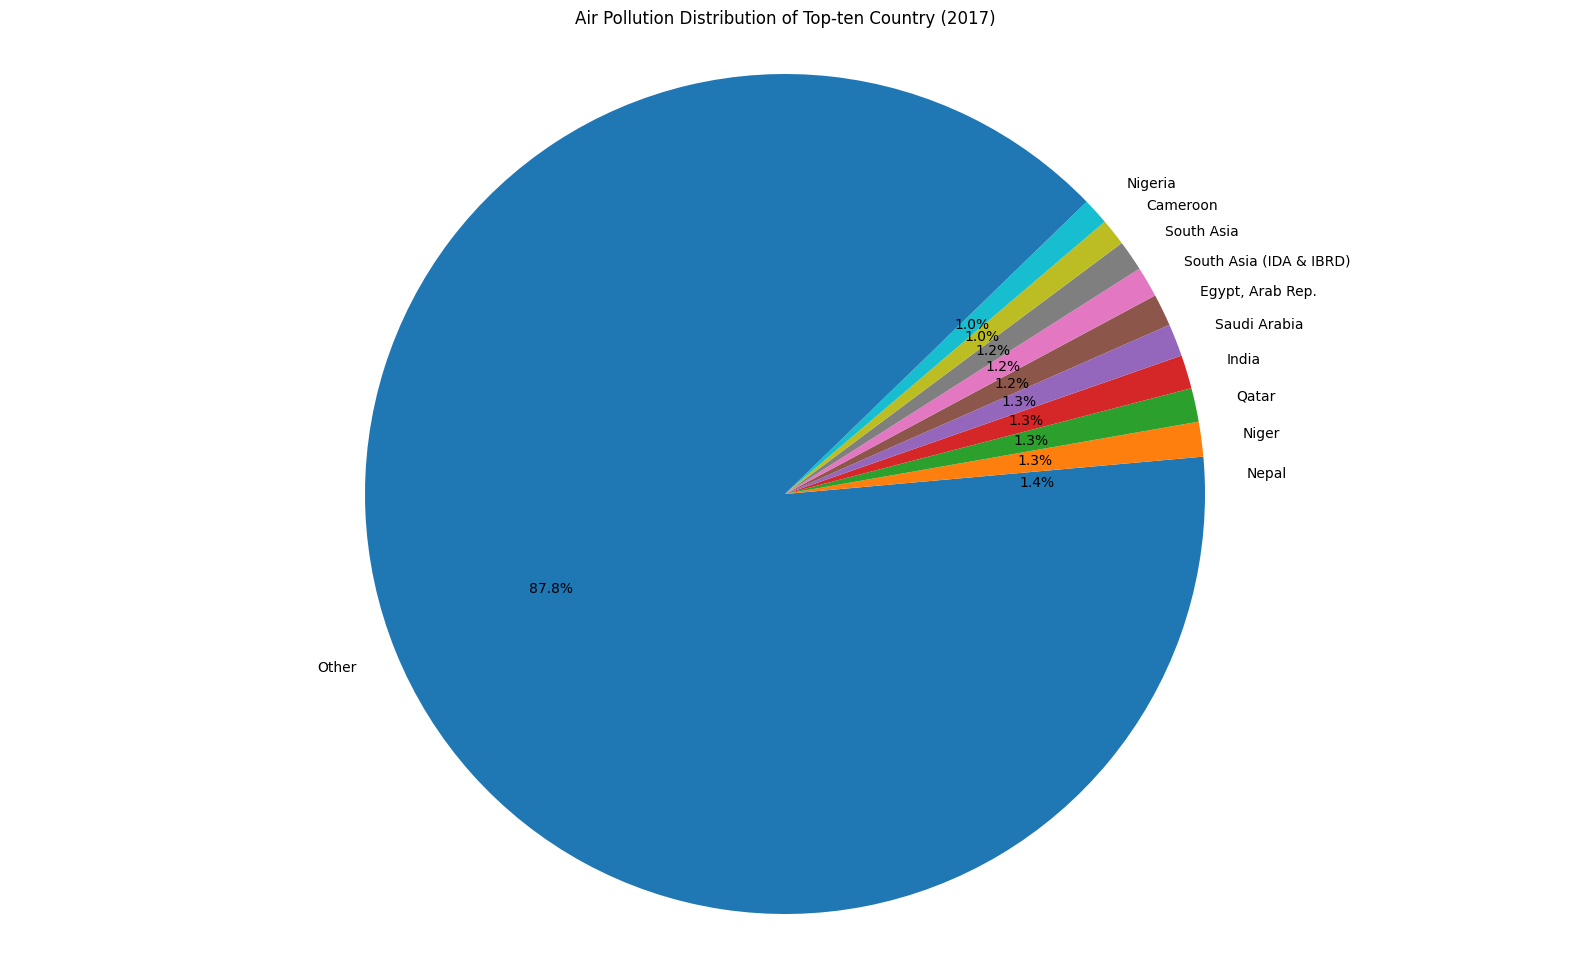

In [35]:
plt.figure(figsize=(20, 12))
plt.pie(pie_data['2017'], labels=pie_data['Country Name'], autopct='%1.1f%%')

plt.title('Air Pollution Distribution of Top-ten Country (2017)')
plt.axis('equal')
plt.show()

In [36]:
data_2010 = data['2010']

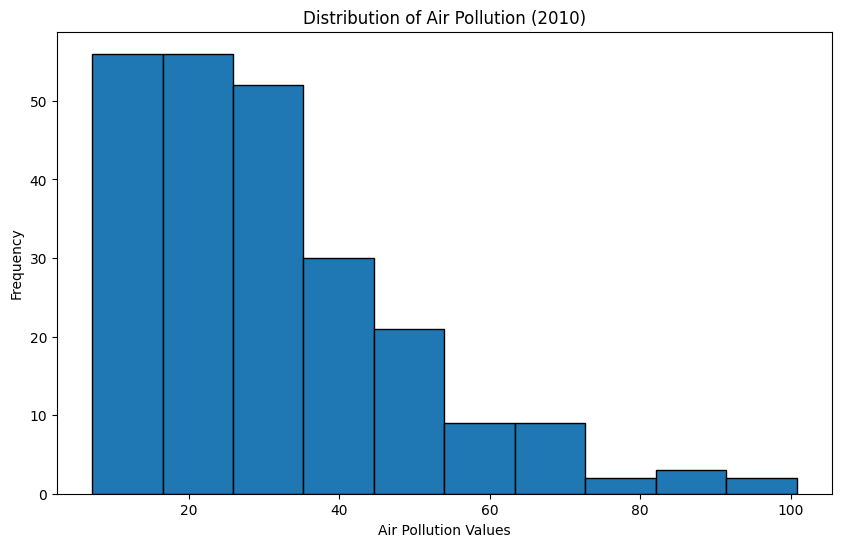

In [37]:
plt.figure(figsize=(10, 6))
plt.hist(data_2010, bins=10, edgecolor='black')
plt.title('Distribution of Air Pollution (2010)')
plt.xlabel('Air Pollution Values')
plt.ylabel('Frequency')
plt.show()

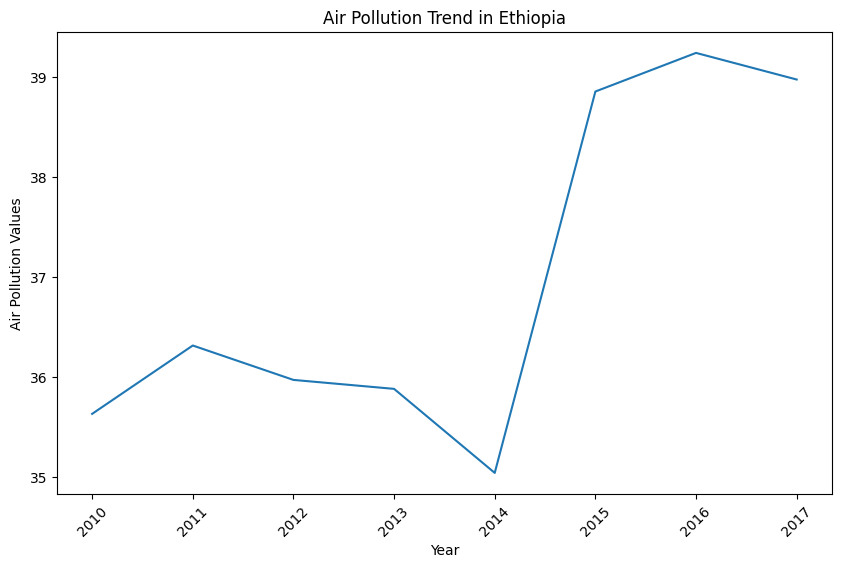

In [38]:
ethiopia_data = data[data['Country Name'] == 'Ethiopia']

# Extract the years and air pollution values for ethiopia
years = data.columns[2:]
ethio_values = ethiopia_data.iloc[0, 2:]

# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(years, ethio_values)
plt.title('Air Pollution Trend in Ethiopia')
plt.xlabel('Year')
plt.ylabel('Air Pollution Values')
plt.xticks(rotation=45)
plt.show()

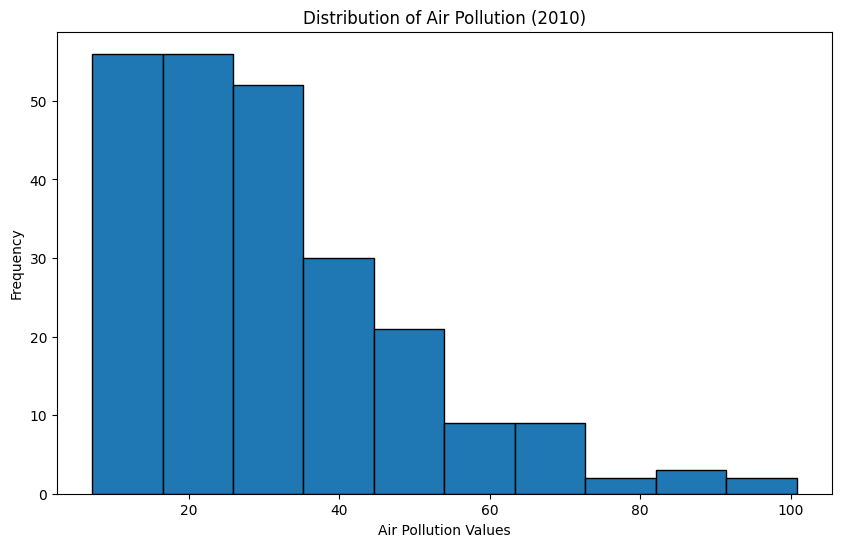

In [39]:
data_2010 = data['2010']

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(data_2010, bins=10, edgecolor='black')
plt.title('Distribution of Air Pollution (2010)')
plt.xlabel('Air Pollution Values')
plt.ylabel('Frequency')
plt.show()

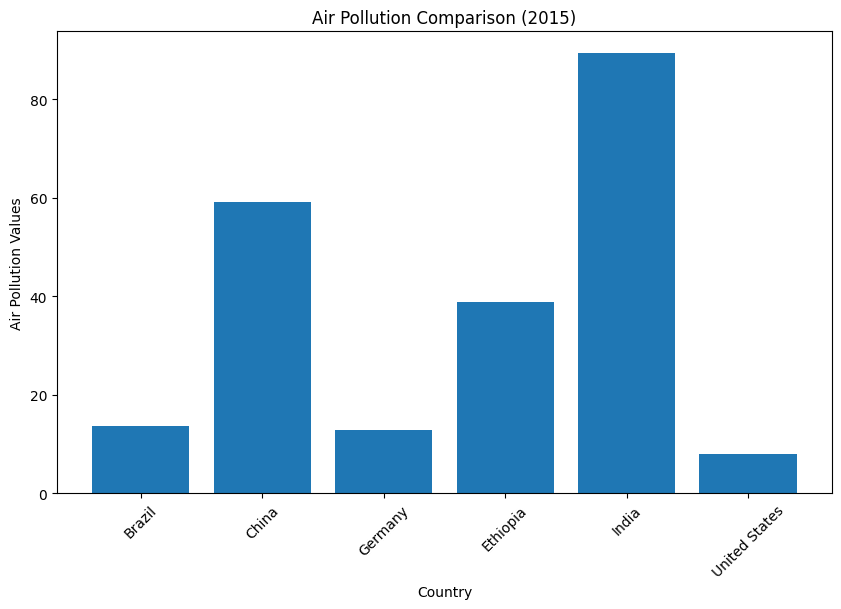

In [40]:


# Select the countries and the desired year
countries = ['China', 'United States', 'India', 'Germany', 'Brazil','Ethiopia']
selected_year = '2015'

# Filter the data for the selected countries and year
selected_data = data[data['Country Name'].isin(countries)]
selected_data = selected_data[['Country Name', selected_year]]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(selected_data['Country Name'], selected_data[selected_year])
plt.title(f'Air Pollution Comparison ({selected_year})')
plt.xlabel('Country')
plt.ylabel('Air Pollution Values')
plt.xticks(rotation=45)
plt.show()

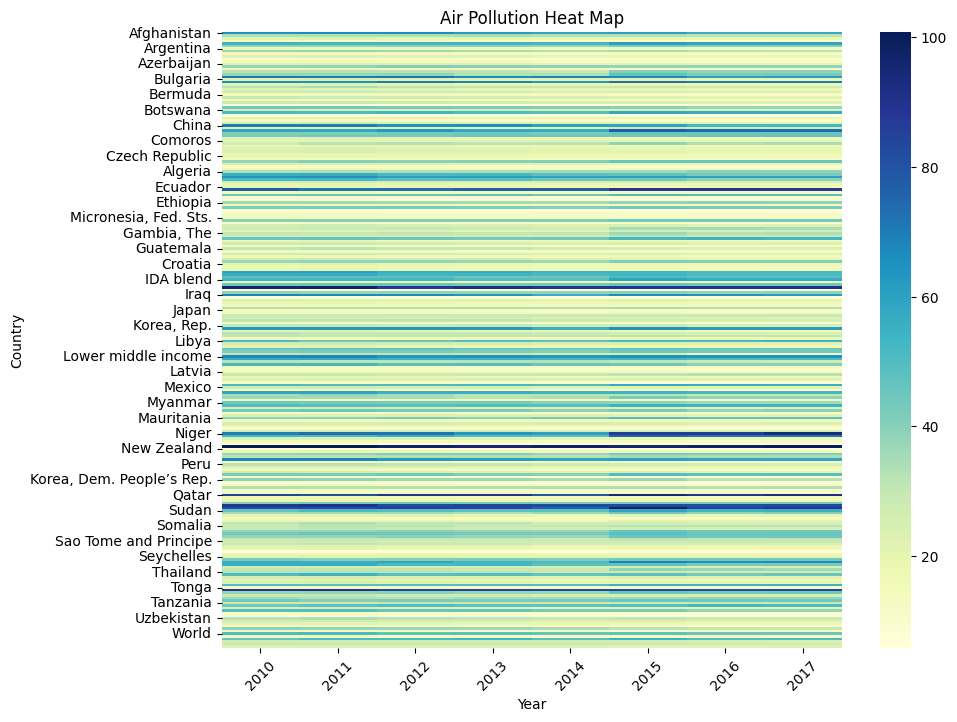

In [41]:
data_heatmap = data.iloc[:, 2:]

# Set the index to be the country names
data_heatmap.set_index(data['Country Name'], inplace=True)

# Plotting the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(data_heatmap, cmap='YlGnBu')
plt.title('Air Pollution Heat Map')
plt.xlabel('Year')
plt.ylabel('Country')
plt.xticks(rotation=45)
plt.show()

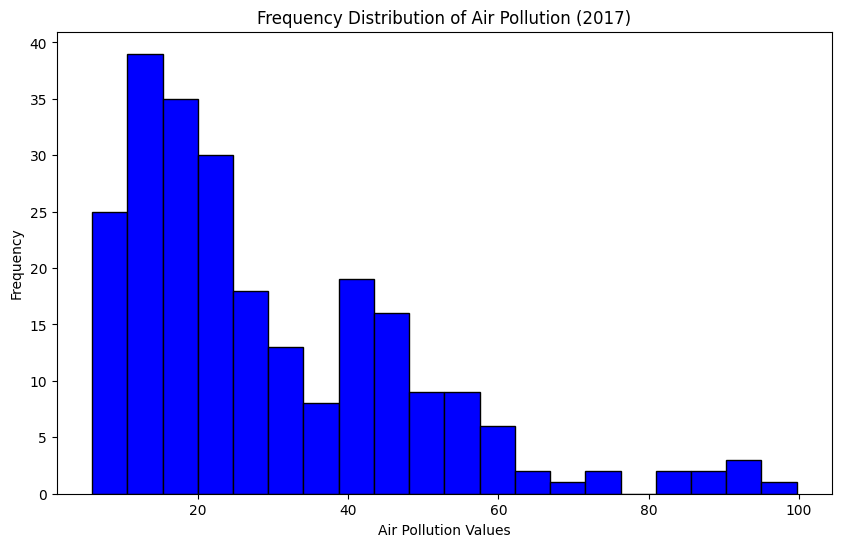

In [42]:
column_name = '2017'  # Choose the desired year

# Filter out missing values
filtered_data = data[column_name].dropna()

# Plotting the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(filtered_data, bins=20, color='blue', edgecolor='black')
plt.title(f'Frequency Distribution of Air Pollution ({column_name})')
plt.xlabel('Air Pollution Values')
plt.ylabel('Frequency')
plt.show()